In [ ]:
# Get semantic model from example_basic.py
from IPython.display import Image

from boring_semantic_layer import to_semantic_table

In [ ]:
# Configuration: Choose backend for visualization
BACKEND = "plotly"  # Options: "altair" or "plotly"

In [ ]:
import ibis

BASE_URL = "https://pub-a45a6a332b4646f2a6f44775695c64df.r2.dev"

con = ibis.duckdb.connect(":memory:")
flights_tbl = con.read_parquet(f"{BASE_URL}/flights.parquet")

flights_sm = (
    to_semantic_table(flights_tbl, name="flights")
    .with_dimensions(arr_time={"expr": lambda t: t.arr_time, "is_time_dimension": True})
    .with_measures(
        flight_count=lambda t: t.count(),
        total_distance=lambda t: t.distance.sum(),
        avg_distance=lambda t: t.distance.mean(),
        max_distance=lambda t: t.distance.max(),
        min_distance=lambda t: t.distance.min(),
    )
)

In [ ]:
flights_sm.query(
    dimensions=["destination"],
    measures=["avg_distance", "flight_count"],
    order_by=[("avg_distance", "desc")],
    limit=10,
).chart(backend=BACKEND)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'measure=avg_distance<br>destination=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'avg_distance',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'avg_distance',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['OGG', 'HNL', 'ANC', 'STT', 'PSE', 'SJU', 'BQN', 'STX', 'BFL', 'LGB'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('vTK239GlpkCok/LppIilQEnBZA4Cmp' ... 'AAAGiYQAAAAAAAUJZA4XcPRPgHlkA='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'measure=flight_count<br>destination=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'flight_count',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'flight_count',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['OGG', 'HNL', 'ANC', 'STT', 'PSE', 'SJU', 'BQN', 'STX', 'BFL', 'LGB'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAADAW0AAAAAAALBwQAAAAAAAWI' ... 'AAAAAIQAAAAAAAACJAAAAAAACwhEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'measure'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'destination'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

# Auto chart detection example: bar chart

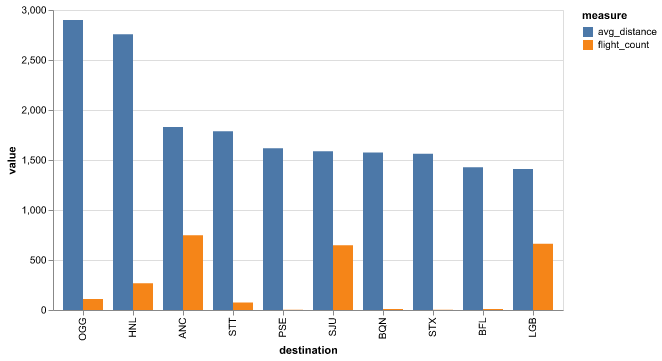

In [5]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=10,
    ).chart(backend=BACKEND, format="png")
)

# Auto chart detection example: time-series

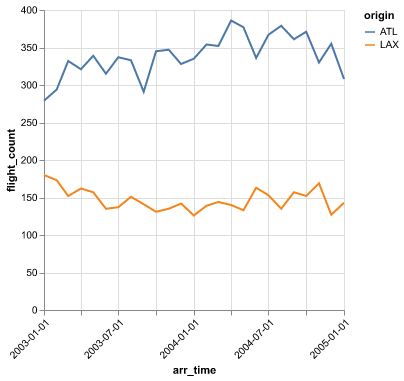

In [7]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2003-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_MONTH",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(backend=BACKEND, format="png")
)

# Auto chart detection example: heatmap

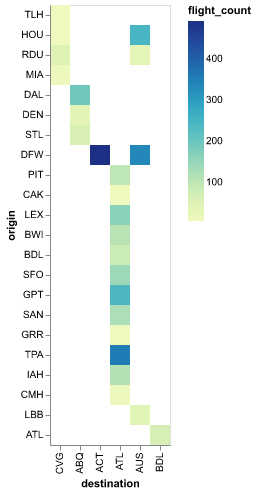

In [8]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination", "origin"], measures=["flight_count"], limit=25
    ).chart(backend=BACKEND, format="png")
)

# Only change the mark, keep auto-detection for the rest

In [ ]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.

# Conditional logic for different backends
spec = {"mark": "line"} if BACKEND == "altair" else {"chart_type": "line"}

Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=20,
    ).chart(spec=spec, backend=BACKEND, format="png")
)

# Query with chart customization

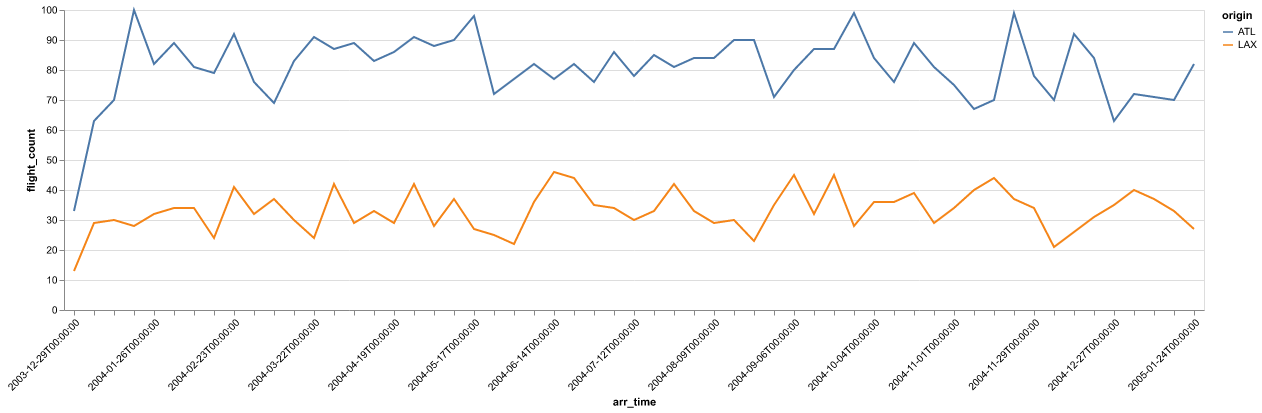

In [11]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.

# Backend-specific chart customization
if BACKEND == "altair":
    spec = {
        "mark": "line",
        "encoding": {
            "x": {
                "field": "arr_time",
                "type": "ordinal",
                "axis": {
                    "labelExpr": "datum.label",
                    "labelOverlap": True,
                    "tickCount": 20,
                    "labelAngle": -45,
                },
            },
            "y": {"field": "flight_count", "type": "quantitative"},
            "color": {"field": "origin", "type": "nominal"},
        },
        "width": 500,
        "height": 300,
    }
else:  # plotly
    spec = {"layout": {"height": 600, "width": 600, "title": "Custom Chart Title"}}

Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2004-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_WEEK",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(spec=spec, backend=BACKEND, format="png")
)

# Output format in JSON - works with both backends

In [12]:
# This option is great for passing the chart spec to a frontend (e.g. in an MCP server context).

json_spec = flights_sm.query(
    dimensions=["destination"],
    measures=["avg_distance"],
    order_by=[("avg_distance", "desc")],
    limit=20,
).chart(backend=BACKEND, format="json")
json_spec

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-84c210a2c9c04f389f71cd9faad56f47'},
 'mark': {'type': 'bar'},
 'encoding': {'tooltip': [{'field': 'destination', 'type': 'nominal'},
   {'field': 'avg_distance', 'type': 'quantitative'}],
  'x': {'field': 'destination', 'sort': None, 'type': 'ordinal'},
  'y': {'field': 'avg_distance', 'type': 'quantitative'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.20.1.json',
 'datasets': {'data-84c210a2c9c04f389f71cd9faad56f47': [{'destination': 'OGG',
    'avg_distance': 2898.90990990991},
   {'destination': 'HNL', 'avg_distance': 2756.3220973782772},
   {'destination': 'ANC', 'avg_distance': 1830.5020080321285},
   {'destination': 'STT', 'avg_distance': 1787.842105263158},
   {'destination': 'PSE', 'avg_distance': 1617.0},
   {'destination': 'SJU', 'avg_distance': 1588.3317901234568},
   {'destination': 'BQN', 'avg_distance': 1576.0},
   {'destination': 'STX', 'avg_distance': 1562.0},
 

In [ ]:
# If backend is plotly, use plotly.io.from_json to convert the JSON back to a figure
if BACKEND == "plotly":
    import plotly

    json_spec = flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance"],
        order_by=[("avg_distance", "desc")],
        limit=20,
    ).chart(backend=BACKEND, format="json")
    fig = plotly.io.from_json(json_spec)
    fig.show()